2178 midterm assignment coding part by Group 22. The colab link is https://colab.research.google.com/drive/1VBHVnd34YHA5lCozSIr5d587Ii8r4UBt?usp=sharing Note: if you can see diagrams directly, please reload and run import part code.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline 
import statsmodels
from scipy import stats
from scipy.stats import levene
import scipy.stats
import math
import random
import statistics
import scipy.stats as sp
from sklearn import linear_model
import statsmodels.stats.api as sms
from datascience import Table
import re
str= "a long string for data science regex check"
ans = re.search("X", str, re.IGNORECASE)
print(ans)
from scipy.stats import ttest_ind
from statsmodels.stats.anova import AnovaRM
from statsmodels.graphics.factorplots import interaction_plot
from statsmodels.formula.api import ols
import statsmodels.api as sm

!pip install scikit_posthocs
!pip install pingouin
!pip install researchpy
import researchpy as rp
import pingouin as pg
from statsmodels.stats.multicomp import pairwise_tukeyhsd

<re.Match object; span=(35, 36), match='x'>
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def cleandata(midtermdata):
  mydf = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
  mydf[['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID','PersonID','Perceived_Race','Sex','Age_group__at_arrest_','Youth_at_arrest__under_18_years','ArrestLocDiv','StripSearch','Booked',
        'Occurrence_Category','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence','ItemsFound','ObjectId']]=mydf[['Arrest_Year', 'Arrest_Month', 'EventID', 'ArrestID','PersonID','Perceived_Race','Sex','Age_group__at_arrest_','Youth_at_arrest__under_18_years','ArrestLocDiv','StripSearch','Booked',
        'Occurrence_Category','Actions_at_arrest___Concealed_i','Actions_at_arrest___Combative__','Actions_at_arrest___Resisted__d','Actions_at_arrest___Mental_inst','Actions_at_arrest___Assaulted_o','Actions_at_arrest___Cooperative','SearchReason_CauseInjury','SearchReason_AssistEscape','SearchReason_PossessWeapons','SearchReason_PossessEvidence','ItemsFound','ObjectId']].a
                                            
  mydf['Sex']=mydf['Sex'].astype('string')
  return mydf

#Preprocessing

In [ ]:
dataset = pd.read_csv('/content/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
dataset.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [ ]:
dataset.shape

(65276, 25)

In [ ]:
group = dataset.groupby('Actions_at_arrest___Mental_inst')
print(group)
group.size()

Actions_at_arrest___Mental_inst
0    63097
1     2179
dtype: int64

In [ ]:
group1 = dataset.groupby('StripSearch')
print(group1)
group1.size()

StripSearch
0    57475
1     7801
dtype: int64

In [ ]:
dataset.groupby(by=['Actions_at_arrest___Mental_inst', 'Sex']).size()

Actions_at_arrest___Mental_inst  Sex
0                                F      12112
                                 M      50978
                                 U          7
1                                F        505
                                 M       1672
                                 U          2
dtype: int64

In [ ]:
dataset.groupby(by=['Actions_at_arrest___Mental_inst', 'ArrestLocDiv']).size()

Actions_at_arrest___Mental_inst  ArrestLocDiv
0                                11               1766
                                 12               1868
                                 13               1081
                                 14               2956
                                 22               1810
                                 23               1713
                                 31               2140
                                 32               2019
                                 33                919
                                 41               2582
                                 42               1785
                                 43               2525
                                 51               4519
                                 52               2228
                                 53               1319
                                 54               1377
                                 55               1487
                   

In [ ]:
dataset.groupby(by=['Actions_at_arrest___Mental_inst', 'Arrest_Year']).size()

Actions_at_arrest___Mental_inst  Arrest_Year
0                                2020           30871
                                 2021           32226
1                                2020            1108
                                 2021            1071
dtype: int64

In [ ]:
dataset.groupby(by=['StripSearch', 'Sex']).size()

StripSearch  Sex
0            F      11334
             M      46132
             U          9
1            F       1283
             M       6518
dtype: int64

In [ ]:
dataset.groupby(by=['StripSearch', 'Age_group__at_arrest_', 'Sex', 'Arrest_Year']).size()

StripSearch  Age_group__at_arrest_      Sex  Arrest_Year
0            Aged 17 years and under    F    2021            278
                                        M    2021           1074
             Aged 17 years and younger  F    2020            424
                                        M    2020            986
             Aged 18 to 24 years        F    2020            868
                                             2021            986
                                        M    2020           3183
                                             2021           3653
                                        U    2020              2
             Aged 25 to 34 years        F    2020           1543
                                             2021           2166
                                        M    2020           6093
                                             2021           8372
                                        U    2020              1
                                 

In [ ]:
df = pd.DataFrame({
    'Mental_inst_count':['3','6','2','17','5','2','14','6','7','6','9','14','59','10','3','8','6','63','6','16','9','61','17','10','61','28','14','26','35','33','175','64','24','25','38','221','6','3','2','12','3','2','11','6','3','11','1','7','60','6','7','13','3','105','8','9','8','71','15','11','40','28','12','15','16','28','210','29','23','14','18','254'],
    'Sex':['F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M','M'],
    'Year':['2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2020','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021','2021'],
    'ArrestLocDiv':['11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX','11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX','11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX','11','12','13','14','22','23','31','32','33','41','42','43','51','52','53','54','55','XX'],
})


print(df)

   Mental_inst_count Sex  Year ArrestLocDiv
0                  3   F  2020           11
1                  6   F  2020           12
2                  2   F  2020           13
3                 17   F  2020           14
4                  5   F  2020           22
..               ...  ..   ...          ...
67                29   M  2021           52
68                23   M  2021           53
69                14   M  2021           54
70                18   M  2021           55
71               254   M  2021           XX

[72 rows x 4 columns]


In [ ]:
df['Mental_inst_count'] = pd.to_numeric(df['Mental_inst_count'], errors='coerce')

In [ ]:
df2 = pd.DataFrame({
    'StripSearch':['27','4','200','15','476','46','313','32','121','14','30','1','4','0','244','5','1046','88','2044','205','1555','198','719','51','309','22','27','5'],
    'Sex':['F','F','F','F','F','F','F','F','F','F','F','F','F','F','M','M','M','M','M','M','M','M','M','M','M','M','M','M'],
    'Year':['2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021','2020','2021',],
    'Age_group__at_arrest_':['<17','<17','18-24','18-24','25-34','25-34','35-44','35-44','45-54','45-54','55-64','55-64','>65','>65','<17','<17','18-24','18-24','25-34','25-34','35-44','35-44','45-54','45-54','55-64','55-64','>65','>65'],
})
print(df2)
df2['StripSearch'] = pd.to_numeric(df2['StripSearch'], errors='coerce')

   StripSearch Sex  Year Age_group__at_arrest_
0           27   F  2020                   <17
1            4   F  2021                   <17
2          200   F  2020                 18-24
3           15   F  2021                 18-24
4          476   F  2020                 25-34
5           46   F  2021                 25-34
6          313   F  2020                 35-44
7           32   F  2021                 35-44
8          121   F  2020                 45-54
9           14   F  2021                 45-54
10          30   F  2020                 55-64
11           1   F  2021                 55-64
12           4   F  2020                   >65
13           0   F  2021                   >65
14         244   M  2020                   <17
15           5   M  2021                   <17
16        1046   M  2020                 18-24
17          88   M  2021                 18-24
18        2044   M  2020                 25-34
19         205   M  2021                 25-34
20        155

#EDA

<AxesSubplot:xlabel='ArrestLocDiv'>

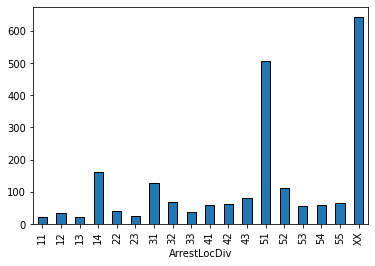

In [ ]:
df_groups = dataset.groupby(['ArrestLocDiv'])['Actions_at_arrest___Mental_inst'].sum()
df_groups.plot(kind='bar')

(0.0, 260.0)

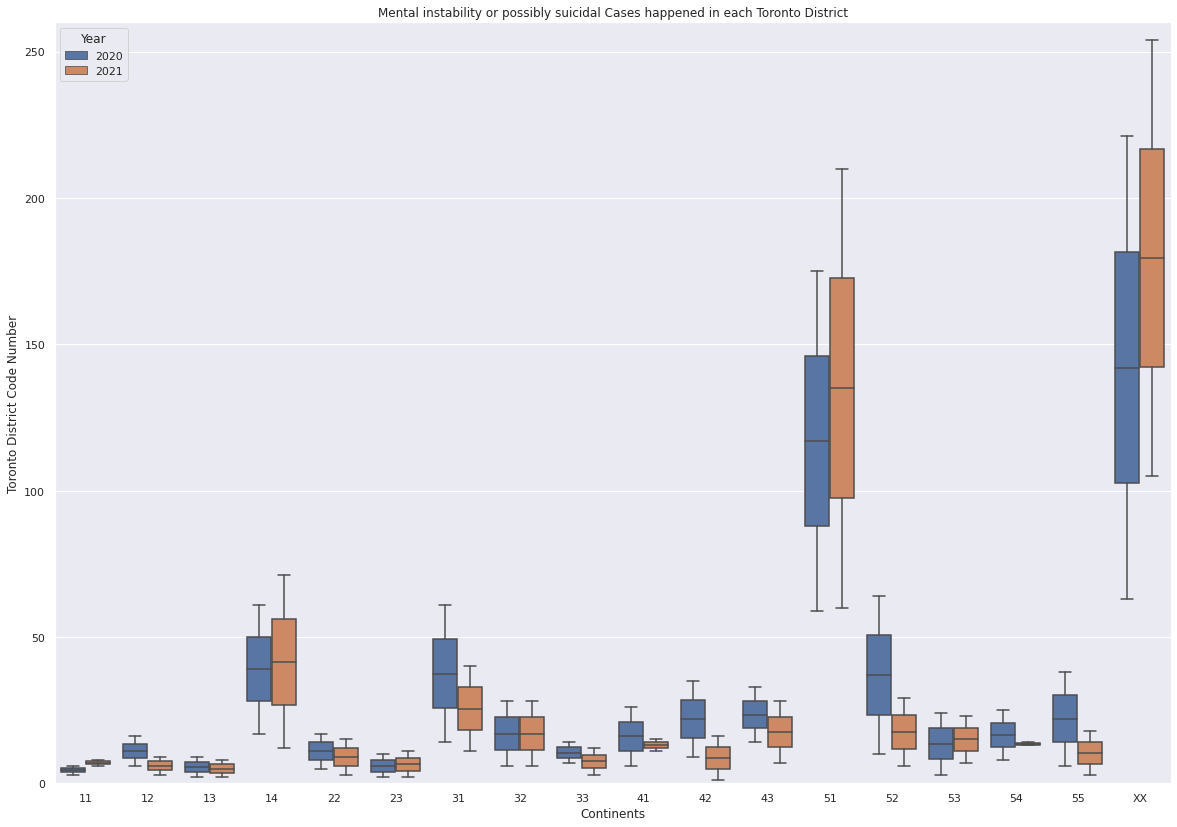

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
p = sns.boxplot(data=df, x = "ArrestLocDiv", y ="Mental_inst_count", hue="Year")
p.set(title = 'Mental instability or possibly suicidal Cases happened in each Toronto District')
p.set(xlabel='Continents', ylabel='Toronto District Code Number')
p.set_ylim(0,260)

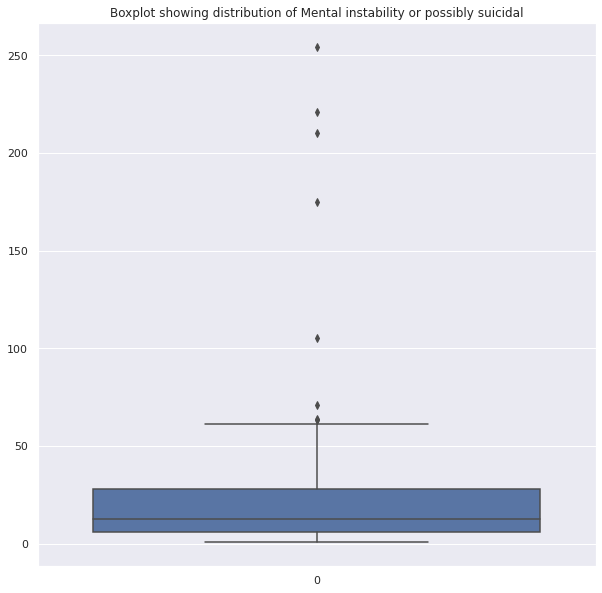

In [ ]:

plt.figure(figsize= (10,10))
sns.boxplot(data = df['Mental_inst_count'])
plt.title('Boxplot showing distribution of Mental instability or possibly suicidal')
plt.xlabel('')
plt.ylabel('')
plt.show()

<AxesSubplot:xlabel='Sex'>

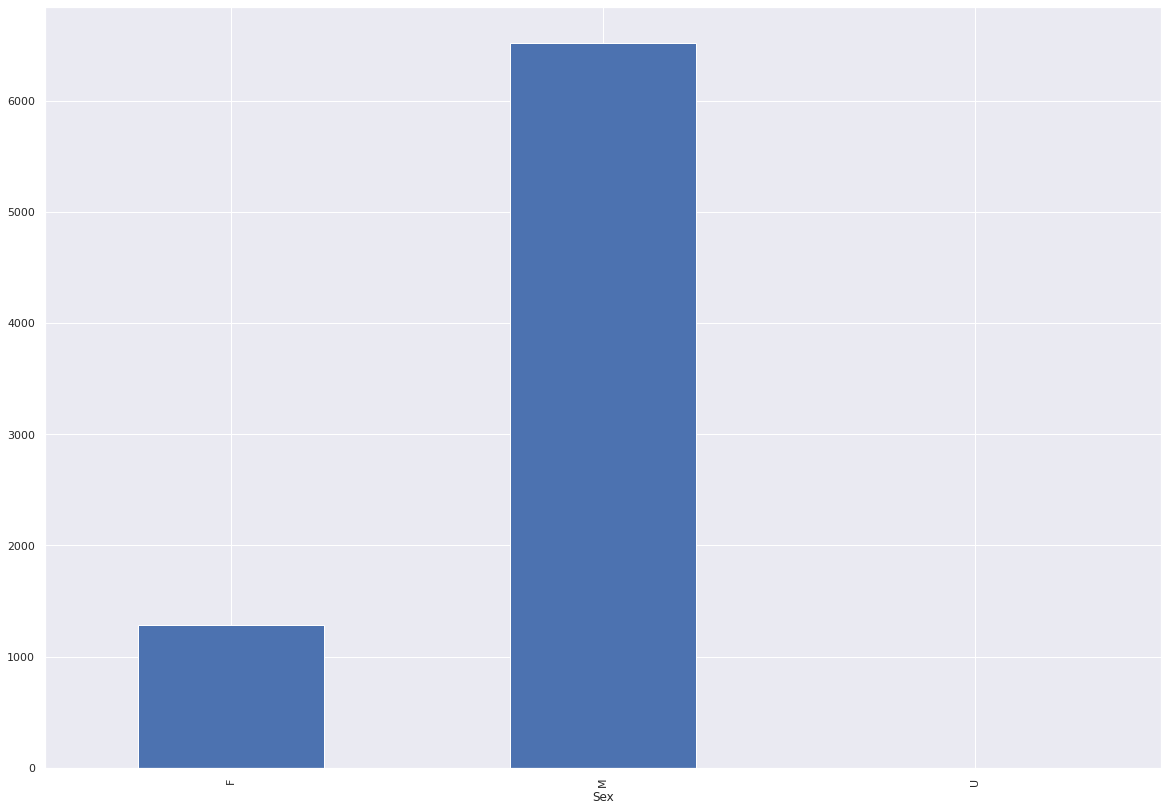

In [ ]:
df_groups2 = dataset.groupby(['Sex'])['StripSearch'].sum()
df_groups2.plot(kind='bar')

<AxesSubplot:xlabel='Age_group__at_arrest_'>

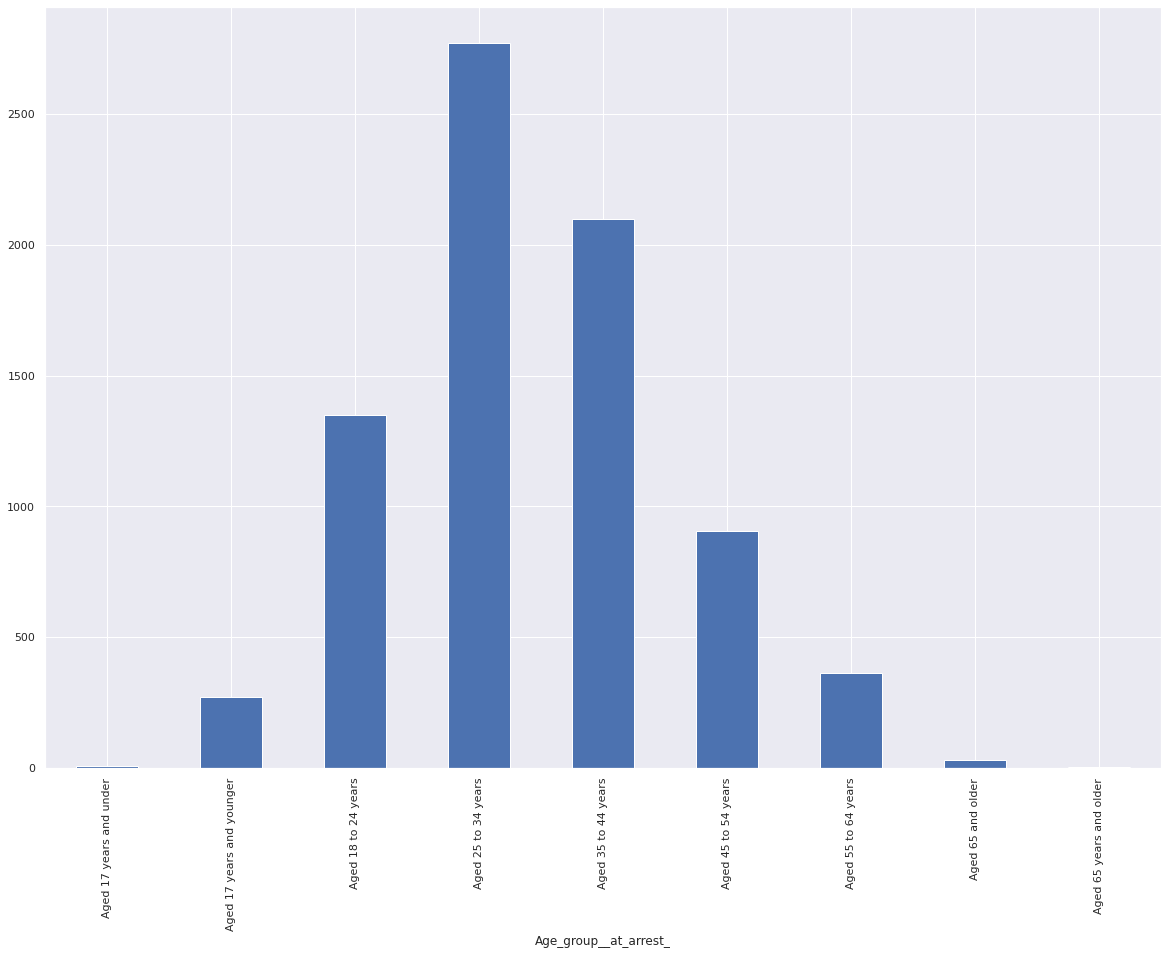

In [ ]:
df_groups3 = dataset.groupby(['Age_group__at_arrest_'])['StripSearch'].sum()
df_groups3.plot(kind='bar')

[Text(0.5, 0, 'Age Group'), Text(0, 0.5, 'Strip Search Cases')]

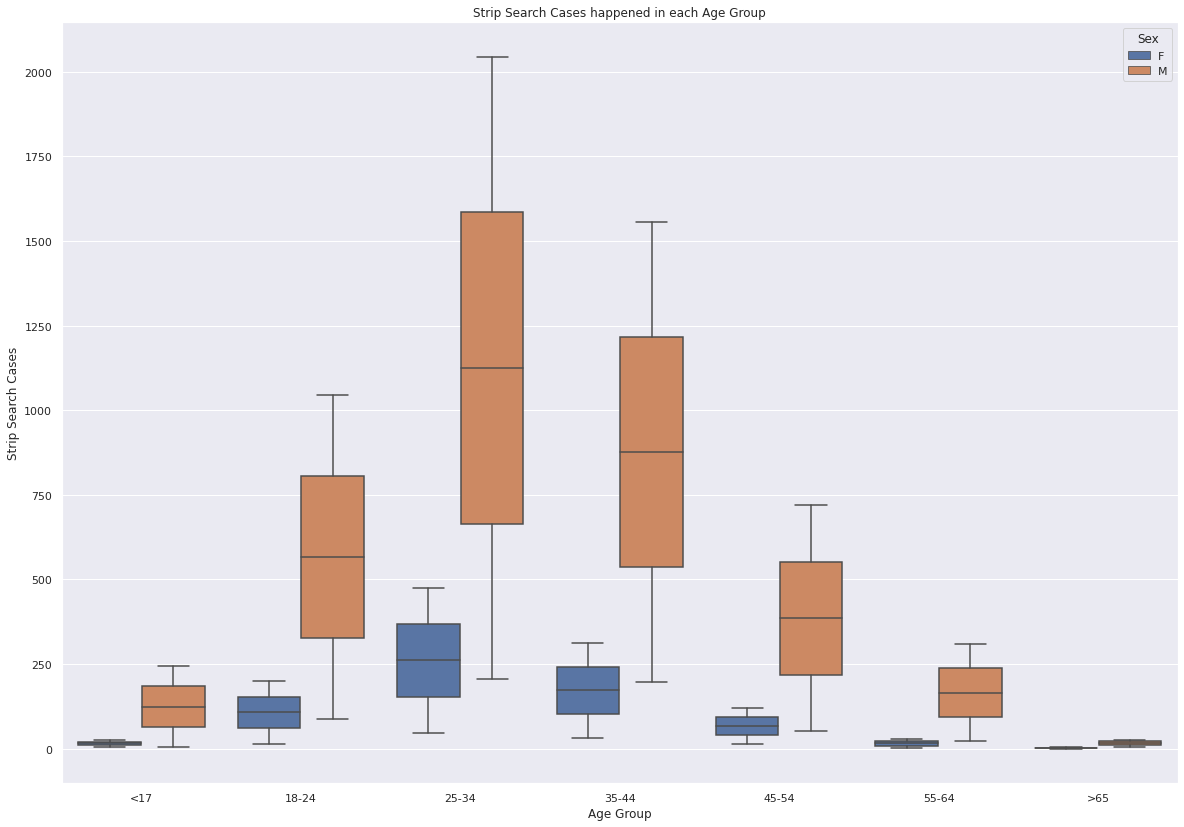

In [ ]:
sns.set(rc={'figure.figsize':(20,14)})
p1 = sns.boxplot(data=df2, x = "Age_group__at_arrest_", y ="StripSearch", hue="Sex")
p1.set(title = 'Strip Search Cases happened in each Age Group')
p1.set(xlabel='Age Group', ylabel='Strip Search Cases')

#T-test

In [ ]:
df['Mental_inst_count'] = pd.to_numeric(df['Mental_inst_count'], errors='coerce')
df['Sex'] = df['Sex'].astype("string")

In [ ]:
df['Sex'].unique()

<StringArray>
['F', 'M']
Length: 2, dtype: string

In [ ]:
df.groupby('Sex')['Mental_inst_count'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,36.0,13.916667,22.089914,1.0,3.0,6.0,11.25,105.0
M,36.0,46.444444,63.385643,6.0,14.0,24.5,38.50,254.0


Hypotheses: </br>
H0: There is no significant difference in Mental instability or possibly suicidal between males and females.</br>
H1: There is a significant difference in Mental instability or possibly suicidal between males and females.

In [ ]:
M = df[df['Sex']=='M']
F = df[df['Sex']=='F']


M_mental = M['Mental_inst_count']
F_mental = F['Mental_inst_count']

#conduct ttest
print('T-test between males and females:',stats.ttest_ind(M_mental, F_mental, equal_var=False)) #p value is significant

T-test between males and females: Ttest_indResult(statistic=2.907530756162966, pvalue=0.0057205865818019631)


In [ ]:
M_mental

18      6
19     16
20      9
21     61
22     17
23     10
24     61
25     28
26     14
27     26
28     35
29     33
30    175
31     64
32     24
33     25
34     38
35    221
54      8
55      9
56      8
57     71
58     15
59     11
60     40
61     28
62     12
63     15
64     16
65     28
66    210
67     29
68     23
69     14
70     18
71    254
Name: Mental_inst_count, dtype: int64

In [ ]:
print('Mean for Mental instability or possibly suicidal, Male, Female:',M_mental.mean(), F_mental.mean())
print('Standard deviation for Mental instability or possibly suicidal, Male, Female:',M_mental.std(), F_mental.std())
     

Mean for Mental instability or possibly suicidal, Male, Female: 46.4444444444 13.9166666667
Standard deviation for Mental instability or possibly suicidal, Male, Female: 63.3856425584 22.0899136647


In [ ]:
cm = sms.CompareMeans(sms.DescrStatsW(M_mental), sms.DescrStatsW(F_mental))
print('Confidence interval for Mental instability or possibly suicidal:',cm.tconfint_diff(usevar='unequal'))

Confidence interval for Mental instability or possibly suicidal: (9.971873710577583, 55.083681844977974)


In [ ]:
#degrees of freedom code for Welch test 

def welch_dof(x, y): 
 
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
    return dof

In [ ]:
#welch dof 
print('DOF for Mental instability or possibly suicidal:',welch_dof(M_mental, F_mental))

DOF for Mental instability or possibly suicidal: 43.3780881415


UNPAIRED TWO SAMPLE T-TEST

In [ ]:
#Then we can do multiple Unpaired Two Sample T-Test to see whether StripSearch varies in different groups of a variable.
# Mental instability or possibly suicidal for 2 different Genders
male_mental = df["Mental_inst_count"][df["Sex"] == "M"]
female_mental = df["Mental_inst_count"][df["Sex"] == "F"]
t_test_gender = stats.ttest_ind(male_mental, female_mental) # Do the t-test
print("Two Sample T-test result for 2 different Genders:\n")
print(t_test_gender)


Two Sample T-test result for 2 different Genders:

Ttest_indResult(statistic=2.907530756162966, pvalue=0.0048764190384856876)


In [ ]:
male_search = df2["StripSearch"][df2["Sex"] == "M"]
female_search = df2["StripSearch"][df2["Sex"] == "F"]
t_test_gender2 = stats.ttest_ind(male_search, female_search) # Do the t-test
print("Two Sample T-test result for Strip Search in 2 different Genders:\n")
print(t_test_gender2)


Two Sample T-test result for Strip Search in 2 different Genders:

Ttest_indResult(statistic=2.1153284880872021, pvalue=0.044140920667480925)


Two-way ANOVA</br>
Hypotheses:</br>
H0: There is no significant main effect of Sex or Age group at arrest on StripSearch.</br>
H1: There is a significant main effect of Sex or Age group at arrest on StripSearch.</br>
H2: There is a significant interaction effect between Sex and Age group at arrest on StripSearch.


In [ ]:
model1 = ols("StripSearch ~ C(Sex) + C(Age_group__at_arrest_) + C(Sex):C(Age_group__at_arrest_)", data=df2).fit()
aov_table1 = sm.stats.anova_lm(model1, typ=2)
print(aov_table1)

                                       sum_sq    df         F    PR(>F)
C(Sex)                           9.787580e+05   1.0  3.893754  0.068542
C(Age_group__at_arrest_)         1.558988e+06   6.0  1.033677  0.444279
C(Sex):C(Age_group__at_arrest_)  6.090137e+05   6.0  0.403802  0.864393
Residual                         3.519126e+06  14.0       NaN       NaN


In [ ]:
model2 = ols("StripSearch ~ C(Year) + C(Age_group__at_arrest_) + C(Year):C(Age_group__at_arrest_)", data=df2).fit()
aov_table2 = sm.stats.anova_lm(model2, typ=2)
print(aov_table2)

                                        sum_sq    df         F    PR(>F)
C(Year)                           1.476144e+06   1.0  7.857849  0.014092
C(Age_group__at_arrest_)          1.558988e+06   6.0  1.383141  0.287750
C(Year):C(Age_group__at_arrest_)  1.000769e+06   6.0  0.887887  0.529137
Residual                          2.629984e+06  14.0       NaN       NaN


In [ ]:
model3 = ols("StripSearch ~ C(Sex) + C(Year) + C(Sex):C(Year)", data=df2).fit()
aov_table3 = sm.stats.anova_lm(model3, typ=2)
print(aov_table3)

                      sum_sq    df         F    PR(>F)
C(Sex)          9.787580e+05   1.0  6.622096  0.016678
C(Year)         1.476144e+06   1.0  9.987320  0.004228
C(Sex):C(Year)  6.637400e+05   1.0  4.490743  0.044619
Residual        3.547244e+06  24.0       NaN       NaN


In [ ]:
df2.loc[df2["Sex"]=="M"]

,StripSearch,Sex,Year,Age_group__at_arrest_
14,244,M,2020,<17
15,5,M,2021,<17
16,1046,M,2020,18-24
17,88,M,2021,18-24
18,2044,M,2020,25-34
19,205,M,2021,25-34
20,1555,M,2020,35-44
21,198,M,2021,35-44
22,719,M,2020,45-54
23,51,M,2021,45-54


In [ ]:
df2.loc[df2["Sex"] == "F"]

,StripSearch,Sex,Year,Age_group__at_arrest_
0,27,F,2020,<17
1,4,F,2021,<17
2,200,F,2020,18-24
3,15,F,2021,18-24
4,476,F,2020,25-34
5,46,F,2021,25-34
6,313,F,2020,35-44
7,32,F,2021,35-44
8,121,F,2020,45-54
9,14,F,2021,45-54


In [ ]:
male_2020 = [244,1046,2044,1555,719,309,27]
male_2021 = [5,88,205,198,51,22,5]
female_2020 = [27,200,476,313,121,30,4]
female_2021 = [4,15,46,32,14,1,0]
df_tukey = pd.DataFrame({'StripSearch':[244,1046,2044,1555,719,309,27,
                      5,88,205,198,51,22,5,
                      27,200,476,313,121,30,4,
                      4,15,46,32,14,1,0],
              'Group':np.repeat(["male_2020", "male_2021", "female_2020", "female_2021"], repeats=7)})
tukey = pairwise_tukeyhsd(endog=df_tukey['StripSearch'],groups=df_tukey['Group'],alpha=0.05)
print(tukey)

        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1      group2    meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------
female_2020 female_2021 -151.2857 0.8746   -718.202  415.6306  False
female_2020   male_2020  681.8571 0.0143   114.9408 1248.7735   True
female_2020   male_2021  -85.2857    0.9   -652.202  481.6306  False
female_2021   male_2020  833.1429 0.0024   266.2265 1400.0592   True
female_2021   male_2021      66.0    0.9  -500.9163  632.9163  False
  male_2020   male_2021 -767.1429 0.0053 -1334.0592 -200.2265   True
--------------------------------------------------------------------


#Interaction plot

In [ ]:
df['Year'] = df['Year'].astype("string")

In [ ]:
df['Year']

0     2020
1     2020
2     2020
3     2020
4     2020
      ... 
67    2021
68    2021
69    2021
70    2021
71    2021
Name: Year, Length: 72, dtype: string

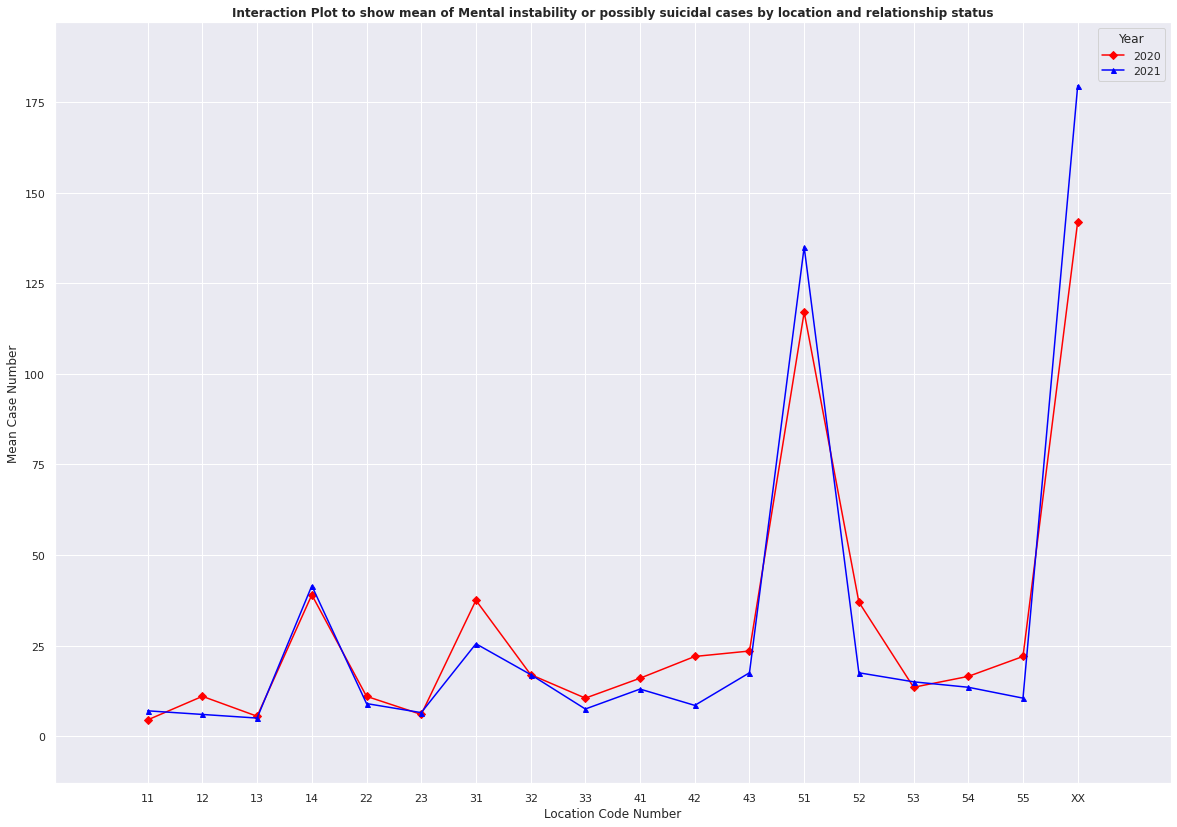

In [ ]:
year = df['Sex'].astype("category")
mental = df['Mental_inst_count'].values


interaction = interaction_plot(df['ArrestLocDiv'], year, mental, colors=['red','blue'], markers=['D','^'], ms=5)
#x axis(m_edu), trace (romantic status of the student), dependent variable (mean grade)


plt.ylabel('Mean Case Number')
plt.xlabel('Location Code Number')
plt.title('Interaction Plot to show mean of Mental instability or possibly suicidal cases by location and relationship status', fontweight='bold')
plt.show()

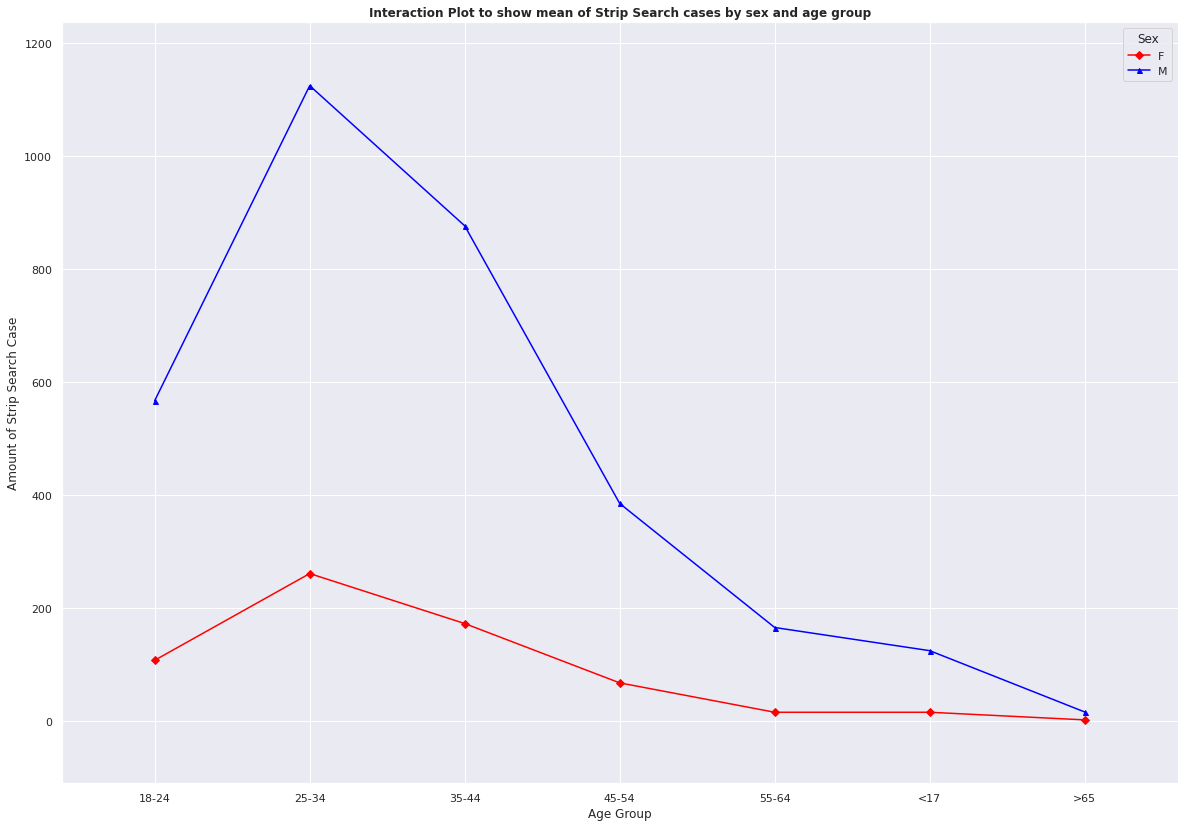

In [ ]:
sex = df2['Sex'].astype("category")
year = df2['Year'].astype("category")
stripsearch = df2['StripSearch'].values
interaction1 = interaction_plot(df2['Age_group__at_arrest_'], sex, stripsearch, colors=['red','blue'], markers=['D','^'], ms=5)
plt.ylabel('Amount of Strip Search Case')
plt.xlabel('Age Group')
plt.title('Interaction Plot to show mean of Strip Search cases by sex and age group', fontweight='bold')
plt.show()

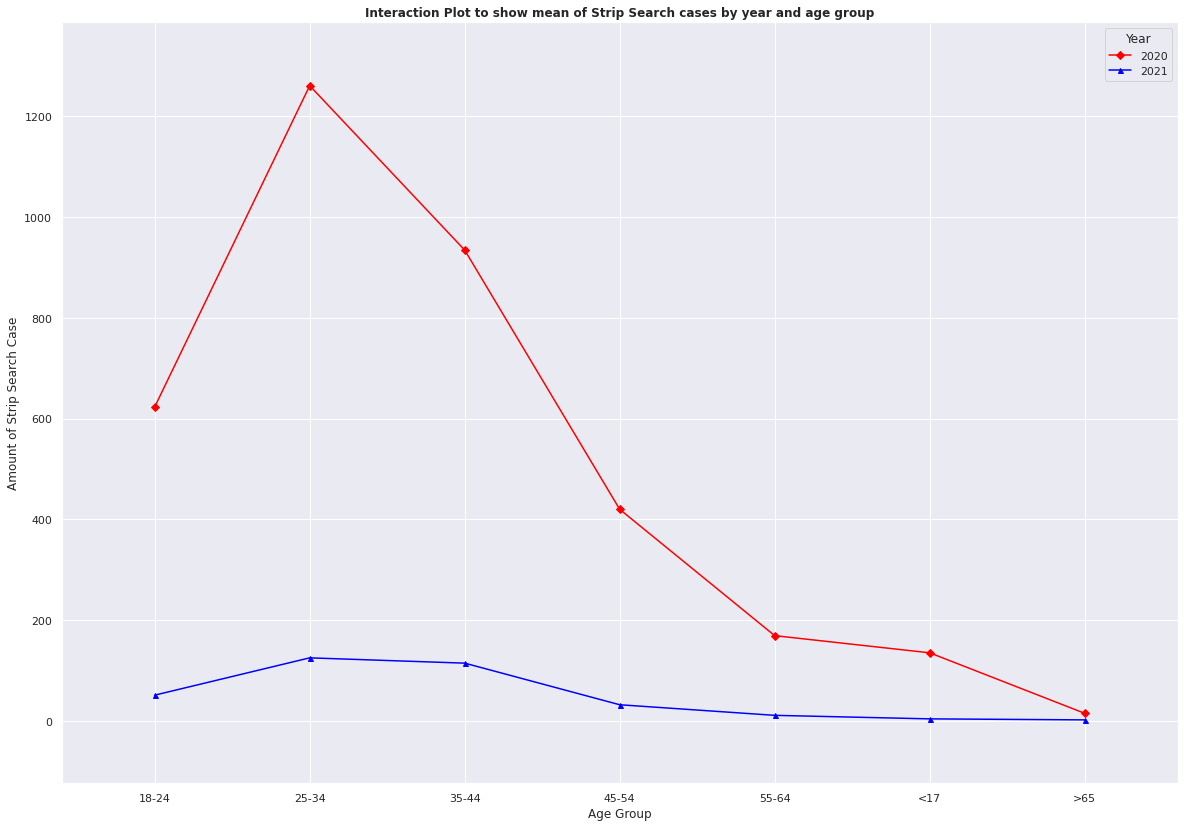

In [ ]:
interaction2 = interaction_plot(df2['Age_group__at_arrest_'], year, stripsearch, colors=['red','blue'], markers=['D','^'], ms=5)
plt.ylabel('Amount of Strip Search Case')
plt.xlabel('Age Group')
plt.title('Interaction Plot to show mean of Strip Search cases by year and age group', fontweight='bold')
plt.show()

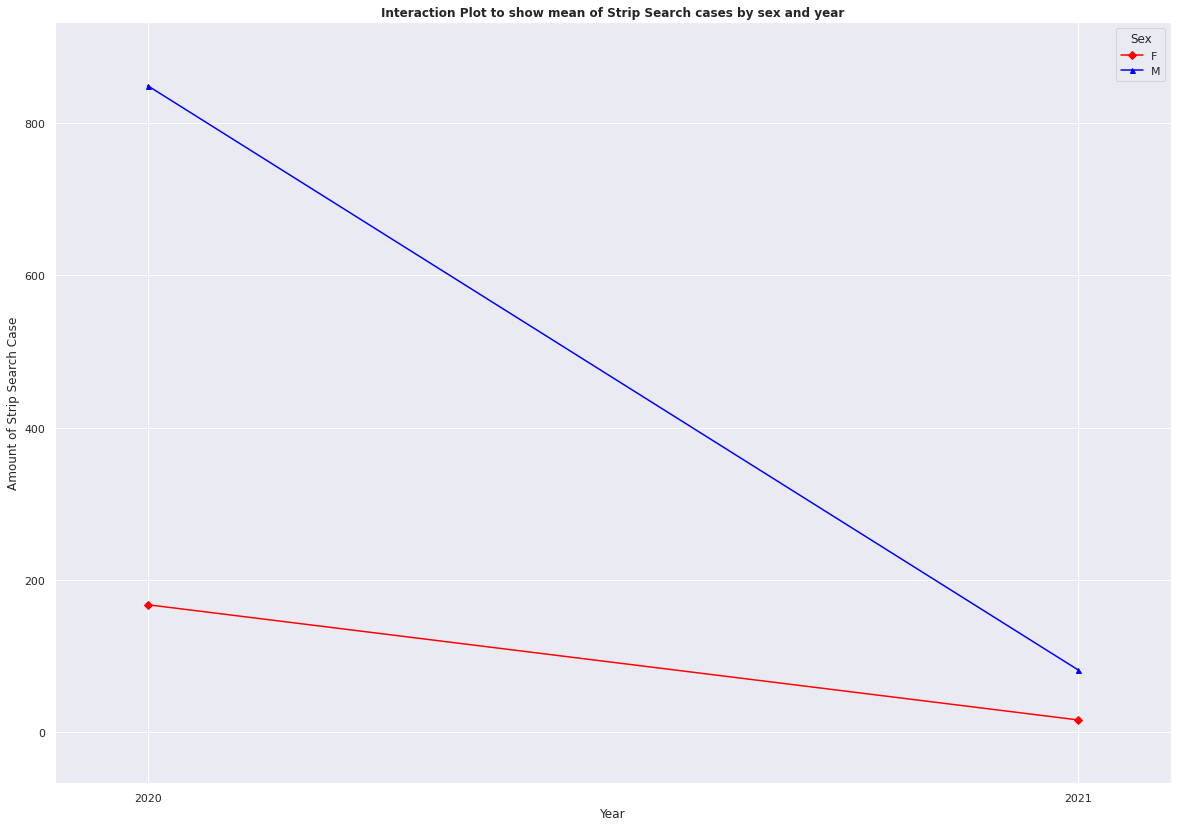

In [ ]:
interaction3 = interaction_plot(df2['Year'], sex, stripsearch, colors=['red','blue'], markers=['D','^'], ms=5)
plt.ylabel('Amount of Strip Search Case')
plt.xlabel('Year')
plt.title('Interaction Plot to show mean of Strip Search cases by sex and year', fontweight='bold')
plt.show()